In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pip install underthesea
%pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 35.2 MB/s eta 0:00:00


In [3]:
FOLDER_PATH = "/content/drive/MyDrive/Phân tích sở thích dựa trên comments fb/Post/"
STOP_WORDS_PATH = "/content/drive/MyDrive/Phân tích sở thích dựa trên comments fb/Group/vietnamese-stopwords.txt"

In [4]:
import pickle
CMT_LIST_PATH = FOLDER_PATH + 'comments_list.pkl'
# Đọc danh sách từ tập tin

with open(CMT_LIST_PATH, 'rb') as f:
    cmt_list = pickle.load(f)

**Phân tích tần suất từ**

In [5]:
import re
import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from underthesea import word_tokenize

# Chuỗi các comment và bài viết
comments = []
for item in cmt_list:
    comments.append(str(item.get('text')))
# for item in post_list:
#     comments.append(str(item.get('text')))
# Loại bỏ đường link
comments = [re.sub(r'http\S+', '', comment) for comment in comments]

# Loại bỏ kí tự đặc biệt và biểu tượng cảm xúc
comments = [re.sub(r'[^\w\s]', '', comment) for comment in comments]

# Kết hợp tất cả các comment và nội dung bài viết thành một chuỗi duy nhất
all_text = ' '.join(comments)

# Tokenize chuỗi thành các từ riêng lẻ
# tokens = word_tokenize(all_text)
tokens = word_tokenize(all_text)

# Chuyển đổi các từ thành chữ thường
lowercase_tokens = [token.lower() for token in tokens]
print(tokens)
# Loại bỏ các stop words (từ không mang nhiều ý nghĩa)
# stop_words = set(stopwords.words('english'))

# Danh sách stopwords tiếng Việt
with open(STOP_WORDS_PATH, "r", encoding="utf-8") as file:
    stopwords_vietnamese = file.readlines()

# Loại bỏ khoảng trắng và ký tự xuống dòng từ mỗi dòng văn bản
stopwords_vietnamese = [line.strip() for line in stopwords_vietnamese]
stopwords_vietnamese1 = [
    "là", "của", "và", "với", "trong", "để", "có", "không", "được", "này",
    "từ", "một", "cũng", "đã", "lại", "như", "đang", "đến", "sẽ", "nếu",
    "vì", "ở", "còn", "nữa", "đấy", "rồi", "hay", "nào", "lên", "xuống",
    "thì", "tới", "năm", "ngày", "tháng", "giờ", "phút", "giây", "trước",
    "sau", "thường", "thậm", "thà", "thì", "tuy", "từng", "vẫn", "vừa",
    "đúng", "sang", "nhưng", "thế", "cả", "về", "theo", "đó", "nên", "ra",
    "rất", "lúc", "lại", "này", "đấy", "vậy", "như", "tại", "thế", "này",
    "đấy", "chỉ", "từng", "vì", "vậy", "đấy", "này", "thế", "thì", "a", "e", "nguyễn", "none", "none none", 'ạ em',
    'đi', 'ok', 'ko', 'đc', 'nguyen', 'nè', 'lắm', 'xong', 'chỗ', 'thử', 'nha', '10'
    # Thêm các từ stopwords tiếng Việt khác vào đây
]
stopwords_vietnamese2 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

stopwords_vietnamese = stopwords_vietnamese + stopwords_vietnamese1 + stopwords_vietnamese2
# Loại bỏ các stop words tiếng Anh và tiếng Việt
filtered_tokens = [token for token in lowercase_tokens if token not in stopwords_vietnamese]

# Đếm tần suất xuất hiện của từng từ
word_freq = Counter(filtered_tokens)

# In các từ khóa phổ biến nhất và tần suất của chúng
top_keywords = word_freq.most_common(20)
for keyword, freq in top_keywords:
    print(keyword, "-", freq)

['Bệnh', 'viê', 'm', 'xoaang', 'viê', 'm', 'mũi', 'trở', 'nặng', 'cả', 'nhà', 'lb', 'anh', 'Trần Văn Xuânn', 'để', 'chữa', 'bệnh', 'nhé', 'Rất', 'khó chịu', 'Rất', 'khó chịu', 'Rất', 'khó chịu', 'Rất', 'khó chịu', 'nhơm nhớp', 'á', 'khó chịu', 'Rất', 'khó chịu', 'Khó chịu', 'thật', 'sợ', 'nhất', 'cái', 'mùa', 'nồm', 'này', 'Rất', 'khó chịu', 'giẫm', 'chỗ', 'nào', 'cũng', 'thấy', 'ướt', 'Rét tí', 'còn', 'hơn', 'kiểu', 'này', 'sợ hãi', 'nhà', 'như', 'bể', 'nước', 'vậy', 'Hôi', 'cả', 'nhà', 'Qua', 'tg', 'mưa', 'nó', 'bắn', 'vào', 'Phơi', 'quần', '3', 'hôm', 'vẫn', 'ẩm', 'ngủ', 'dậy', 'mở cửa', 'phòng', 'ra', 'eoo', 'ướt', 'vaii Đt', 'chảy', 'mồ hôi', 'nhà', 'tao', 'nhà sàn', 'ko', 'sao', 'Khó chịu', 'vail', 'Đeo kính', 'hấp hơi', 'là', 'bt', 'r', 'ăn', 'Tết', 'kiểu', 'này', 'à', 'Kinh vai', 'Trong', 'nhà', 'nhìn', 'ra', 'ngoài', 'cửa', 'chính', 'cửa sổ', 'mờ', 'đục', 'T lau', 'nhà', 'ngày', 'vài', 'chục', 'lần', 'Chán cái', 'cuộc đời', 'Nắng', 'đi', 'Minh Ngọc', 'đúng', 'là', 'nồm', 'ẩm',

In [6]:
# Import thư viện WordCloud
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

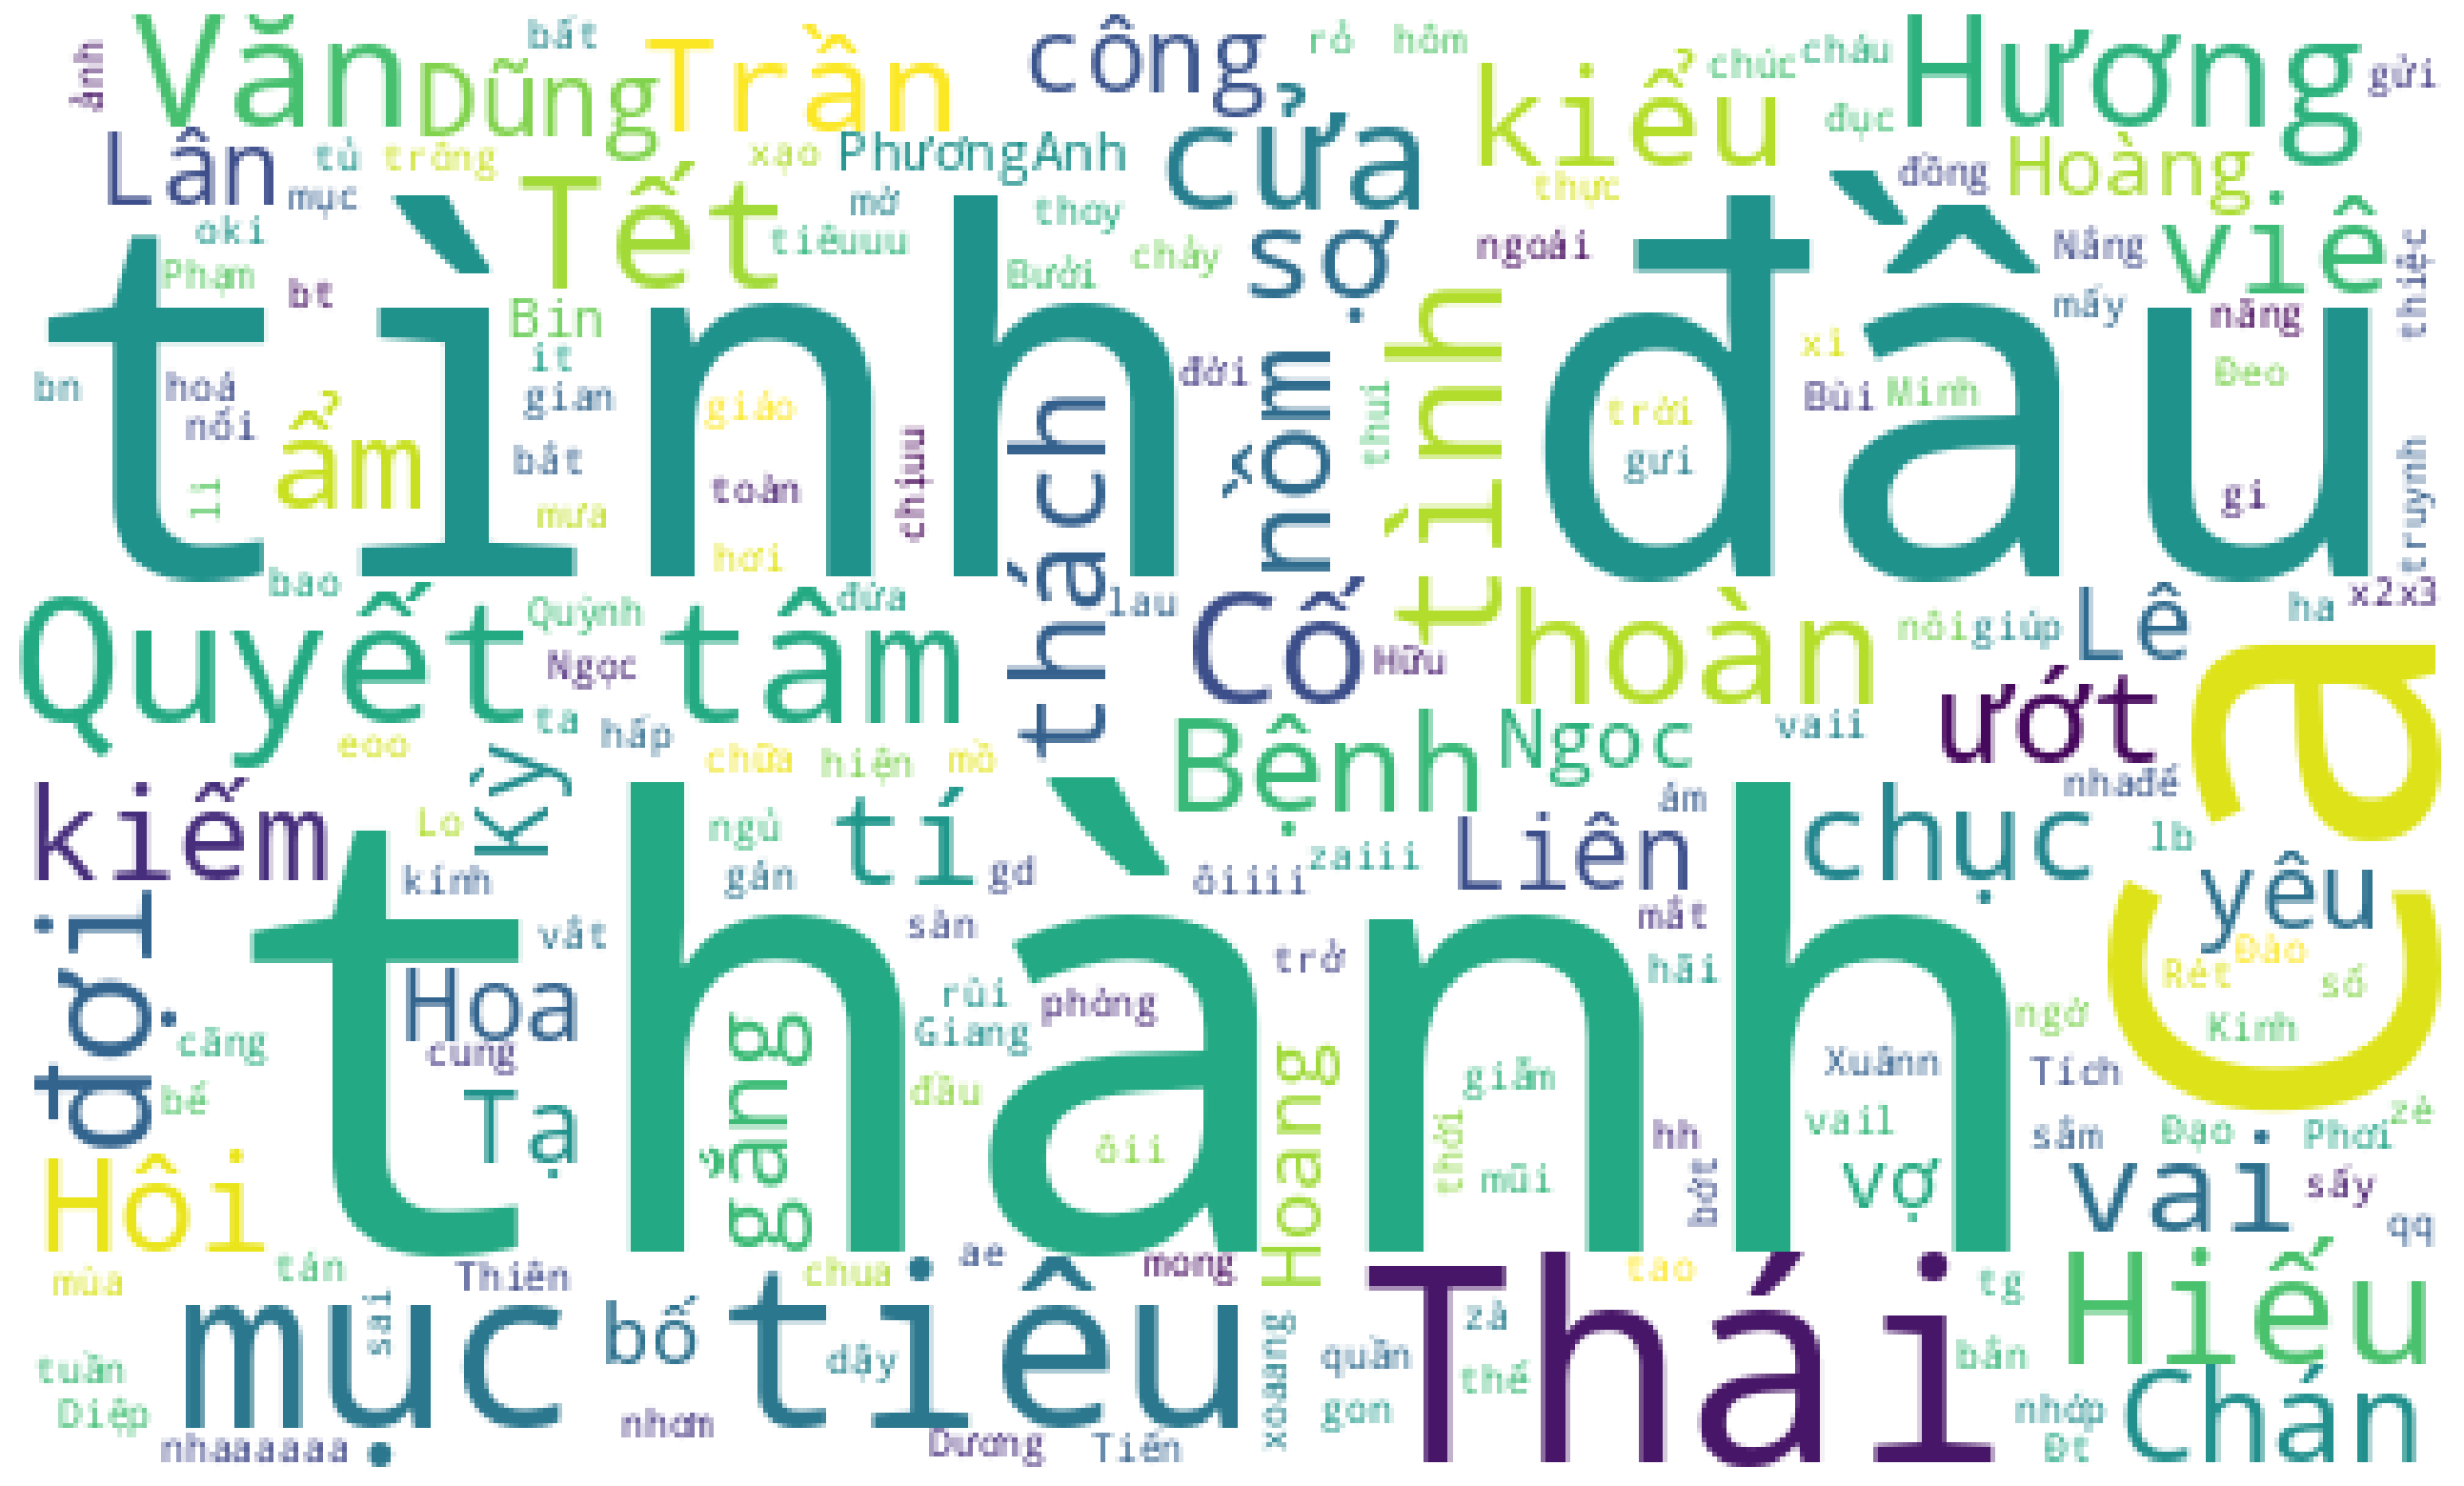

In [7]:
wordcloud = WordCloud(stopwords=stopwords_vietnamese,
                          background_color='white',
                      max_words=300,
                      width=500, height=300
                         ).generate(all_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()